In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\baksh\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [9]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)    


In [10]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape) 
print("shape of Y_test:", Y_test.shape)


shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


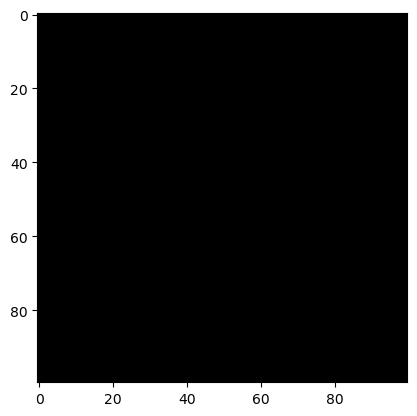

In [19]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [20]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.4880 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.4870 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.5005 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4790 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.4910 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.4895 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5090 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5210 - loss: 0.6930 - val_accuracy: 0

In [25]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.6931


[0.6931471228599548, 0.5]

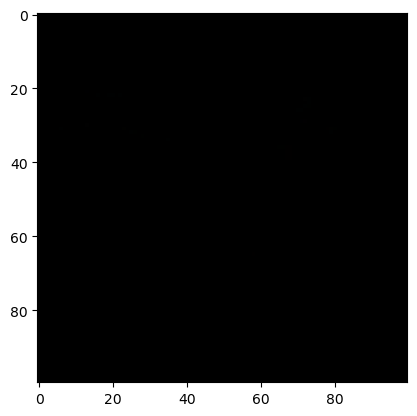

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
The model prediction is dog


In [26]:
idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"

else: 
    pred = 'cat'

print("The model prediction is", pred)

In [27]:
model.save('model.h5')
print('our model is saved')

our model is saved
